## Building a regression model

### Installing library

In [1]:
!pip install yellowbrick

     |████████████████████████████████| 389kB 1.6MB/s eta 0:00:01


### Importing libraries

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

## kc_house_data

Source: https://www.kaggle.com/junkal/selecting-the-best-regression-model/data

### Read and upload dataset from your local machine

In [3]:
house_data = pd.read_csv('datasets/kc_house_data.csv')

house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Shape of datasets

In [4]:
house_data.shape

(21613, 21)

### Data Info

In [5]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null int64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(4), int64(16), object(1)
memory usage: 3.5+ MB


### Check `NaN` values

In [6]:
house_data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### In information of meta data, dates are in object formate you should have to make into date formate so that it make sense and use it as a feature of dataset

In [7]:
house_data['date'] = pd.to_datetime(house_data['date'])

house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Observation of yr_renovated vs sqft_basement

In [8]:
house_data[['yr_renovated', 'sqft_basement']].sample(10)

,yr_renovated,sqft_basement
16754,0,1380
14936,0,0
8777,0,0
13235,2000,1070
7770,0,210
1246,0,0
4287,0,280
20951,0,0
19775,0,0
13896,0,140


### Find age of house by subtracting  from `year of sold date `  to `year of build  date`

In [9]:
house_data['house_age'] = house_data['date'].dt.year - house_data['yr_built']

### Label encoding

In [10]:
house_data['renovated'] = house_data['yr_renovated'].apply(lambda x : 0 if x == 0 else 1)

house_data['sqft_basement'] = house_data['sqft_basement'].apply(lambda x : 0 if x == 0 else 1)

### Drop un wanted features

In [11]:
house_data = house_data.drop(['date', 'yr_renovated', 'yr_built', 'id', 'zipcode', 
                              'lat', 'long'], axis=1)

house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,house_age,renovated
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1340,5650,59,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,1,1690,7639,63,1
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,2720,8062,82,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,1,1360,5000,49,0
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1800,7503,28,0


In [12]:
sorted(house_data['bedrooms'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 33]

In [13]:
sorted(house_data['grade'].unique())

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

In [14]:
house_data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'sqft_living15', 'sqft_lot15', 'house_age',
       'renovated'],
      dtype='object')

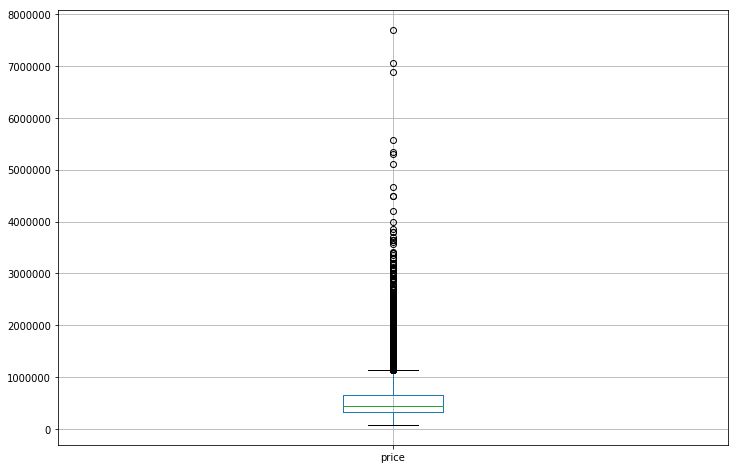

In [15]:
house_data[['price']].boxplot(figsize=(12, 8))

### Scatter plot `price` vs `sqft_living`

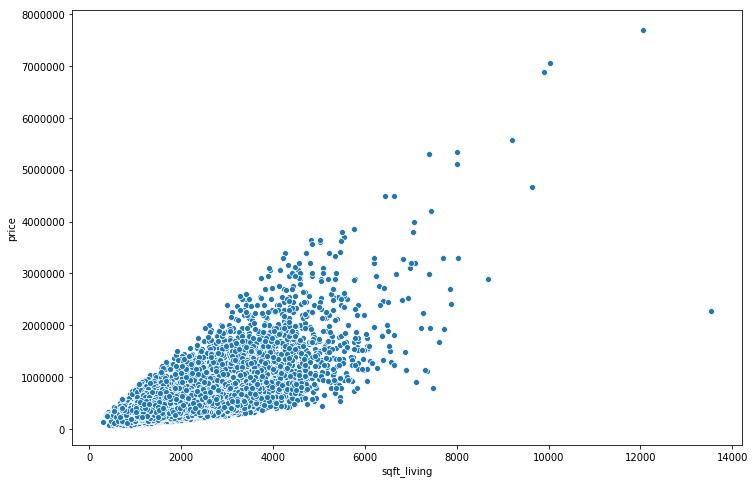

In [16]:
plt.figure(figsize=(12, 8))

sns.scatterplot('sqft_living', 'price', data=house_data);

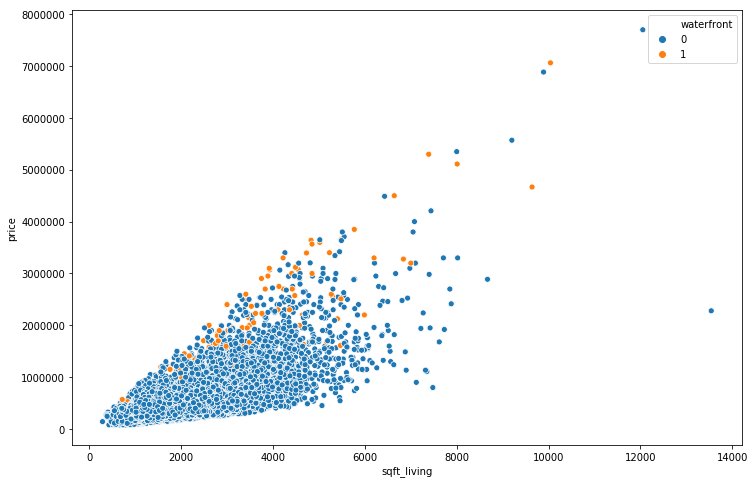

In [17]:
plt.figure(figsize=(12, 8))

sns.scatterplot('sqft_living', 'price', hue='waterfront', data=house_data);

### Stripplot
A strip plot is a scatter plot where one of the variables is categorical. They can be combined with other plots to provide additional information. For example, a boxplot with an overlaid strip plot becomes more similar to a violin plot because some additional information about how the underlying data is distributed becomes visible. Seaborn’s swarmplot is virtually identical except that it prevents datapoints from overlapping.

http://alanpryorjr.com/visualizations/seaborn/stripplot/stripplot/

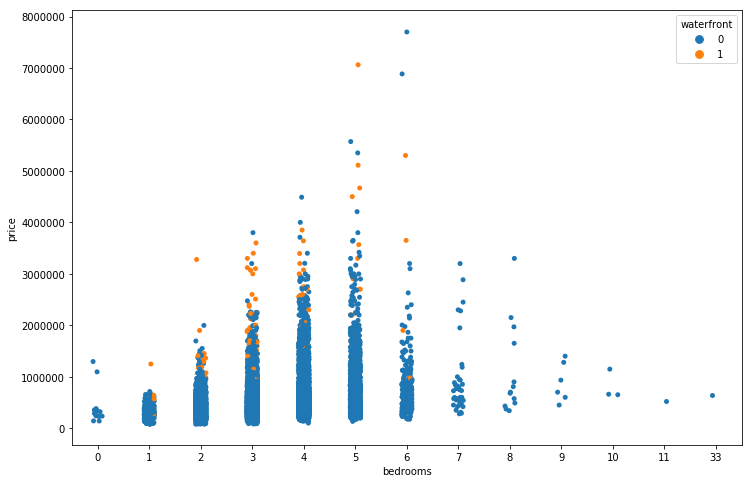

In [18]:
plt.figure(figsize=(12, 8))

sns.stripplot('bedrooms', 'price', hue='waterfront', data=house_data);

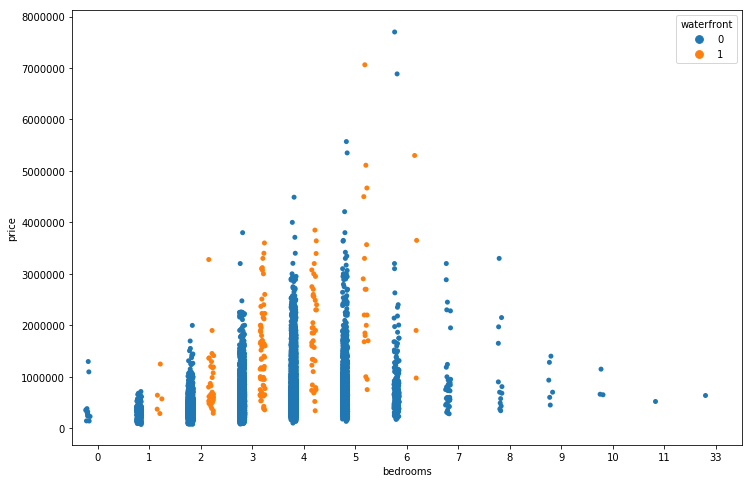

In [19]:
plt.figure(figsize=(12, 8))

sns.stripplot('bedrooms', 'price', hue='waterfront', 
              dodge=True,
              data=house_data);

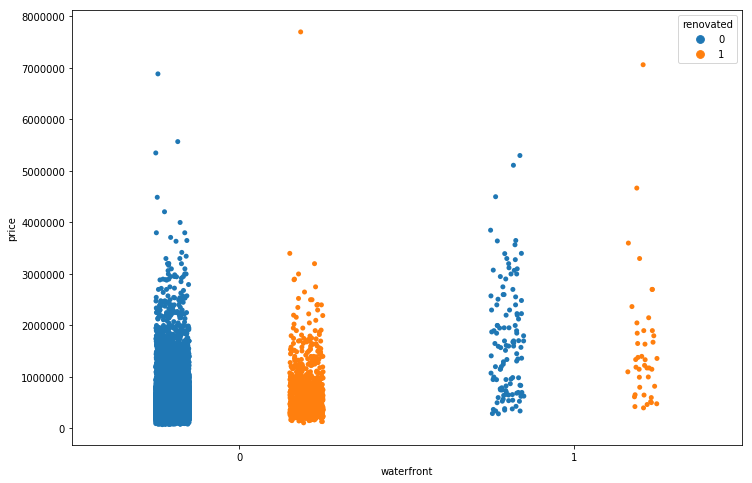

In [20]:
plt.figure(figsize=(12, 8))

sns.stripplot('waterfront', 'price', hue='renovated',
              dodge=True,
              data=house_data);

### Boxplot
Boxplot gives an idea about density of data distributed.

https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

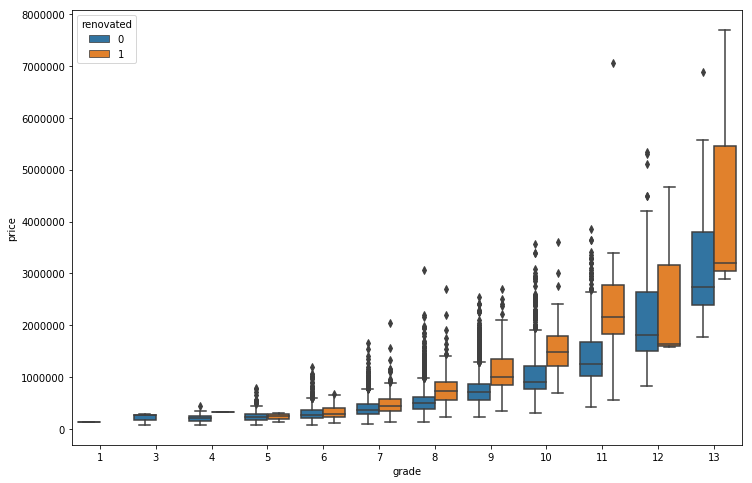

In [21]:
plt.figure(figsize=(12, 8))

sns.boxplot('grade', 'price', hue='renovated',
             dodge=True,
             data=house_data);

### features selections

In [22]:
X = house_data[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'house_age']]

### Correlation

In [23]:
correlation = X.corr()

correlation

,price,bedrooms,bathrooms,sqft_living,floors,house_age
price,1.000000,0.308350,0.525138,0.702035,0.256794,-0.053951
bedrooms,0.308350,1.000000,0.515884,0.576671,0.175429,-0.154324
bathrooms,0.525138,0.515884,1.000000,0.754665,0.500653,-0.506407
sqft_living,0.702035,0.576671,0.754665,1.000000,0.353949,-0.318488
floors,0.256794,0.175429,0.500653,0.353949,1.000000,-0.489640
house_age,-0.053951,-0.154324,-0.506407,-0.318488,-0.489640,1.000000


### Heatmap
which gives us correlation values

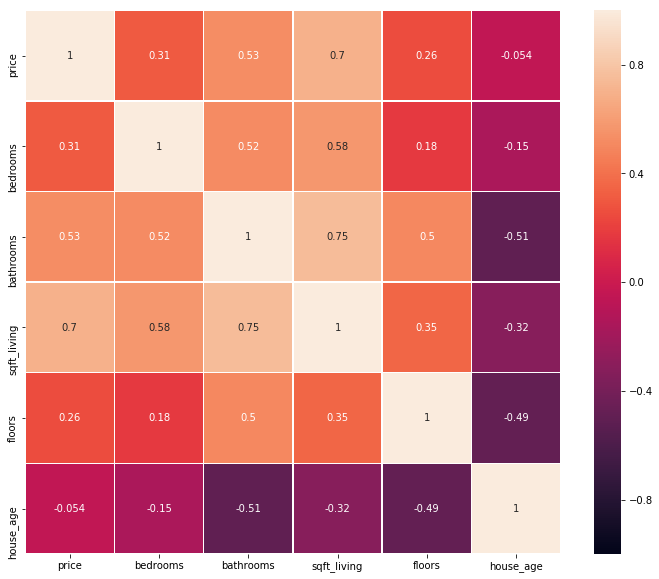

In [24]:
plt.figure(figsize=(12, 10))

sns.heatmap(correlation, annot=True, linewidths=.5, vmin=-1, vmax=1)
plt.show()

In [25]:
X = house_data[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'house_age']]

Y = house_data['price']

### Find most correlation features

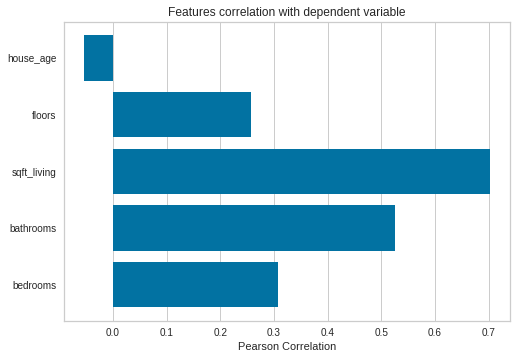

In [26]:
from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(labels=X.columns, method='pearson')

visualizer.fit(X, Y)

visualizer.poof();

In [27]:
house_data.to_csv('datasets/kc_house_data_processed.csv', index=False)

In [28]:
!ls datasets

kc_house_data.csv  kc_house_data_processed.csv	Mall_Customers.csv
